****** INDONESIA COVID-19 ANALYSIS ******

WHO AM I?

Hi, my name is Eugene Pirono, a Sophomore From Indonesia, at Boston University Studying Data Science and Applied Mathematics (Statistics)

WHAT IS THIS?

This a personal project of mine, where I am analyzing the COVID-19 Case in Indonesia. At this stage, I have not covered machine learning in my university course, so I did not apply any machine learning algorithm within the analysis. I have just cleaned the Data and provide some insights through bar graph and plots. Morover I have provided statistical insights through variable correlation heatmap and correlation between existing variables within the dataset. 

IMPROVEMENTS TO THE PROJECT? 

- Machine Learning algorithm could be implemented to predict the future outcome of covid-19 cases in Indonesia
- More visualization of each region within Indonesia should be projected, to get a better understanding of the Covid-19 pandemic in Indonesia
- Update the database to understand the long term effect of a pandemic 
- Add maps visualization of Covid-19 Density in Indonesia 


More about me: 

Linktree: https://linktr.ee/eugenepirono


In [2]:
import os
import numpy as np
import pandas as pd
import random
import seaborn as sns

import datetime as datetime
import matplotlib.dates as dates
import matplotlib.pyplot as plt

from contextlib import contextmanager
from time import time
from tqdm import tqdm


import datetime
from datetime import date

%matplotlib inline

In [3]:
# Extracting all of the Covid-19 Data from the CSV File 
covid_data = pd.read_csv('covid_19_Indonesia.csv')
covid_data

,Date,Location ISO Code,Location,New Cases,New Deaths,New Recovered,New Active Cases,Total Cases,Total Deaths,Total Recovered,...,New Deaths per Million,Total Deaths per Million,Case Fatality Rate,Case Recovered Rate,Growth Factor of New Cases,Growth Factor of New Deaths,Name,Item,Kind,Hidden
0,1/8/2020,ID-JI,Jawa Timur,9,3,1,5,9,5,10,...,0.07,0.12,55.56%,111.11%,NaN,NaN,NaN,NaN,NaN,NaN
1,1/9/2020,ID-JI,Jawa Timur,0,1,23,-24,9,6,33,...,0.02,0.15,66.67%,366.67%,0.00,0.33,NaN,NaN,NaN,NaN
2,1/10/2020,ID-JI,Jawa Timur,0,1,14,-15,9,7,47,...,0.02,0.17,77.78%,522.22%,1.00,1.00,NaN,NaN,NaN,NaN
3,1/11/2020,ID-JI,Jawa Timur,0,3,8,-11,9,10,55,...,0.07,0.25,111.11%,611.11%,1.00,3.00,NaN,NaN,NaN,NaN
4,1/12/2020,ID-JI,Jawa Timur,0,3,1,-4,9,13,56,...,0.07,0.32,144.44%,622.22%,1.00,1.00,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16278,7/9/2021,ID-SG,Sulawesi Tenggara,124,1,3,120,12447,252,10412,...,0.38,95.62,2.02%,83.65%,0.92,0.50,NaN,NaN,NaN,NaN
16279,7/9/2021,ID-SA,Sulawesi Utara,278,9,9,260,17424,572,15525,...,3.41,216.51,3.28%,89.10%,1.24,9.00,NaN,NaN,NaN,NaN
16280,7/9/2021,ID-SB,Sumatera Barat,718,10,275,433,55675,1259,48840,...,1.81,228.11,2.26%,87.72%,0.93,1.00,NaN,NaN,NaN,NaN
16281,7/9/2021,ID-SS,Sumatera Selatan,341,6,221,114,31147,1569,27088,...,0.73,190.93,5.04%,86.97%,1.15,0.38,NaN,NaN,NaN,NaN


In [4]:
# Constraint represent the column names alongside its data, that is null and that is not being analyzed. 
constraint = ['City or Regency','Name','Item','Kind','Hidden','Location ISO Code',
                'Province','Country','Continent','Island','Time Zone','Special Status',
                'Total Regencies','Total Cities','Total Districts','Total Urban Villages',
                'Total Rural Villages','New Cases per Million','Total Cases per Million',
                'New Deaths per Million','Total Deaths per Million','Case Fatality Rate',
                'Case Recovered Rate','Growth Factor of New Cases','Growth Factor of New Deaths']

# We will drop associated data within the contraint array from the original dataset. 
data = covid_data.drop(constraint ,axis = 1)
data = data.fillna(0)
data.head()

,Date,Location,New Cases,New Deaths,New Recovered,New Active Cases,Total Cases,Total Deaths,Total Recovered,Total Active Cases,Location Level,Area (km2),Population,Population Density,Longitude,Latitude
0,1/8/2020,Jawa Timur,9,3,1,5,9,5,10,-6,Province,47803,40479023,846.78,112.732941,-7.723346
1,1/9/2020,Jawa Timur,0,1,23,-24,9,6,33,-30,Province,47803,40479023,846.78,112.732941,-7.723346
2,1/10/2020,Jawa Timur,0,1,14,-15,9,7,47,-45,Province,47803,40479023,846.78,112.732941,-7.723346
3,1/11/2020,Jawa Timur,0,3,8,-11,9,10,55,-56,Province,47803,40479023,846.78,112.732941,-7.723346
4,1/12/2020,Jawa Timur,0,3,1,-4,9,13,56,-60,Province,47803,40479023,846.78,112.732941,-7.723346


In [5]:
#Output all of the Column and its type. 
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16283 entries, 0 to 16282
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                16283 non-null  object 
 1   Location            16283 non-null  object 
 2   New Cases           16283 non-null  int64  
 3   New Deaths          16283 non-null  int64  
 4   New Recovered       16283 non-null  int64  
 5   New Active Cases    16283 non-null  int64  
 6   Total Cases         16283 non-null  int64  
 7   Total Deaths        16283 non-null  int64  
 8   Total Recovered     16283 non-null  int64  
 9   Total Active Cases  16283 non-null  int64  
 10  Location Level      16283 non-null  object 
 11  Area (km2)          16283 non-null  int64  
 12  Population          16283 non-null  int64  
 13  Population Density  16283 non-null  float64
 14  Longitude           16283 non-null  float64
 15  Latitude            16283 non-null  float64
dtypes: f

In [6]:
cleaned_data = data[data['Location Level'] != 'Country']
cleaned_data.head()

,Date,Location,New Cases,New Deaths,New Recovered,New Active Cases,Total Cases,Total Deaths,Total Recovered,Total Active Cases,Location Level,Area (km2),Population,Population Density,Longitude,Latitude
0,1/8/2020,Jawa Timur,9,3,1,5,9,5,10,-6,Province,47803,40479023,846.78,112.732941,-7.723346
1,1/9/2020,Jawa Timur,0,1,23,-24,9,6,33,-30,Province,47803,40479023,846.78,112.732941,-7.723346
2,1/10/2020,Jawa Timur,0,1,14,-15,9,7,47,-45,Province,47803,40479023,846.78,112.732941,-7.723346
3,1/11/2020,Jawa Timur,0,3,8,-11,9,10,55,-56,Province,47803,40479023,846.78,112.732941,-7.723346
4,1/12/2020,Jawa Timur,0,3,1,-4,9,13,56,-60,Province,47803,40479023,846.78,112.732941,-7.723346


In [7]:
newest = cleaned_data.drop_duplicates(subset='Location', keep="last")
newest.head()

,Date,Location,New Cases,New Deaths,New Recovered,New Active Cases,Total Cases,Total Deaths,Total Recovered,Total Active Cases,Location Level,Area (km2),Population,Population Density,Longitude,Latitude
16249,7/9/2021,Aceh,80,13,108,-41,20140,862,15541,3737,Province,57956,5247257,90.54,96.910522,4.225615
16250,7/9/2021,Bali,674,6,0,668,54079,1618,46181,6280,Province,5780,4216171,729.43,115.131714,-8.369472
16251,7/9/2021,Banten,514,4,49,461,61689,1457,50554,9678,Province,9663,10722374,1109.64,106.109004,-6.456736
16252,7/9/2021,Bengkulu,101,0,67,34,11671,194,9530,1947,Province,19919,1999539,100.38,102.338421,-3.533584
16253,7/9/2021,DKI Jakarta,13112,138,15022,-2048,636383,9270,527060,100053,Province,664,10846145,16334.31,106.836118,-6.204699


In [8]:
newest[newest.Location != 'Indonesia'].sort_values(by=['Total Cases'], ascending=False)

,Date,Location,New Cases,New Deaths,New Recovered,New Active Cases,Total Cases,Total Deaths,Total Recovered,Total Active Cases,Location Level,Area (km2),Population,Population Density,Longitude,Latitude
16253,7/9/2021,DKI Jakarta,13112,138,15022,-2048,636383,9270,527060,100053,Province,664,10846145,16334.31,106.836118,-6.204699
16257,7/9/2021,Jawa Barat,7399,160,4974,2265,440379,6008,348694,85677,Province,35378,45161325,1276.55,107.603708,-6.920432
16258,7/9/2021,Jawa Tengah,4530,202,3042,1286,285348,12562,223706,49080,Province,32801,36364072,1108.64,110.201115,-7.259097
16259,7/9/2021,Jawa Timur,2530,168,1727,635,189705,13635,160296,15774,Province,47803,40479023,846.78,112.732941,-7.723346
16263,7/9/2021,Kalimantan Timur,1021,18,433,570,83762,2003,73864,7895,Province,129067,3552191,27.52,116.468440,0.453858
16274,7/9/2021,Riau,504,16,299,189,74899,2019,67986,4894,Province,87024,6074100,69.80,101.805109,0.511648
16254,7/9/2021,Daerah Istimewa Yogyakarta,1665,44,902,719,72560,1892,54352,16316,Province,3133,3631015,1158.90,110.444878,-7.894502
16276,7/9/2021,Sulawesi Selatan,511,7,119,385,67280,1021,62671,3588,Province,46717,9426885,201.78,120.162056,-3.731081
16251,7/9/2021,Banten,514,4,49,461,61689,1457,50554,9678,Province,9663,10722374,1109.64,106.109004,-6.456736
16280,7/9/2021,Sumatera Barat,718,10,275,433,55675,1259,48840,5576,Province,42013,5519245,131.37,100.465062,-0.850253


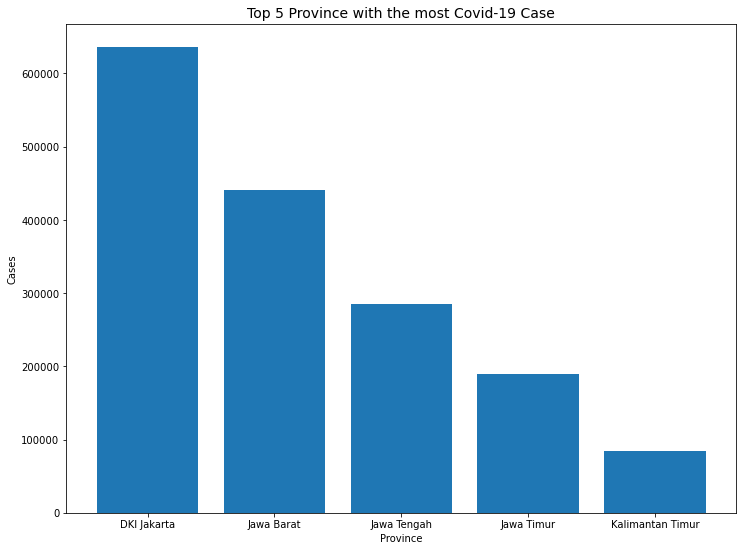

In [9]:
#Top 5 province with the most COVID-19 case 
plt.figure(figsize=(12,9))
plt.bar(newest[newest.Location != 'Indonesia'].sort_values(by=['Total Cases'], ascending=False)['Location'].values[:5], newest[newest.Location != 'Indonesia'].sort_values(by=['Total Cases'], ascending=False)['Total Cases'].values[:5])
plt.title('Top 5 Province with the most Covid-19 Case', fontsize=14)
plt.xlabel('Province')
plt.ylabel('Cases')
plt.show()

/Users/eugene/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


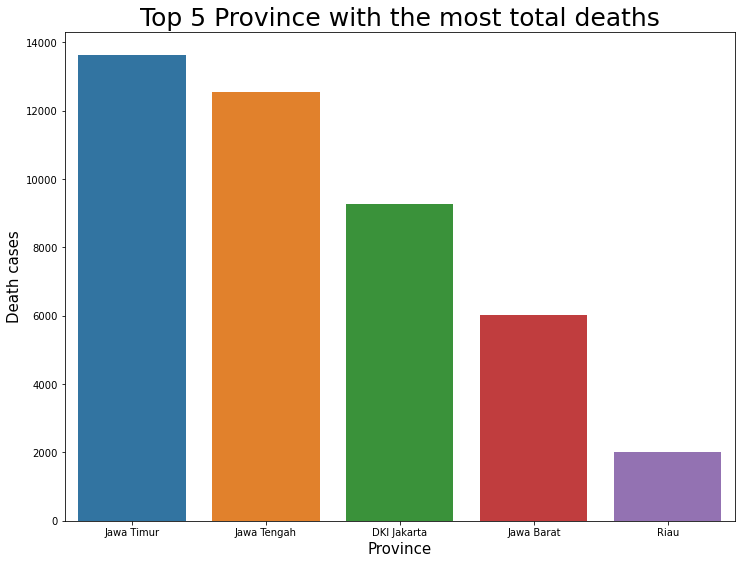

In [10]:
# Top 5 provinces with the most number of Deaths 
plt.figure(figsize=(12,9))
sns.barplot(newest[newest.Location != 'Indonesia'].sort_values(by=['Total Deaths'], ascending=False)['Location'].values[:5],  newest[newest.Location != 'Indonesia'].sort_values(by=['Total Deaths'], ascending=False)['Total Deaths'].values[:5])
plt.title('Top 5 Province with the most total deaths', fontsize=25)
plt.xlabel('Province', fontsize=15)
plt.ylabel('Death cases', fontsize=15)
plt.show()

/Users/eugene/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


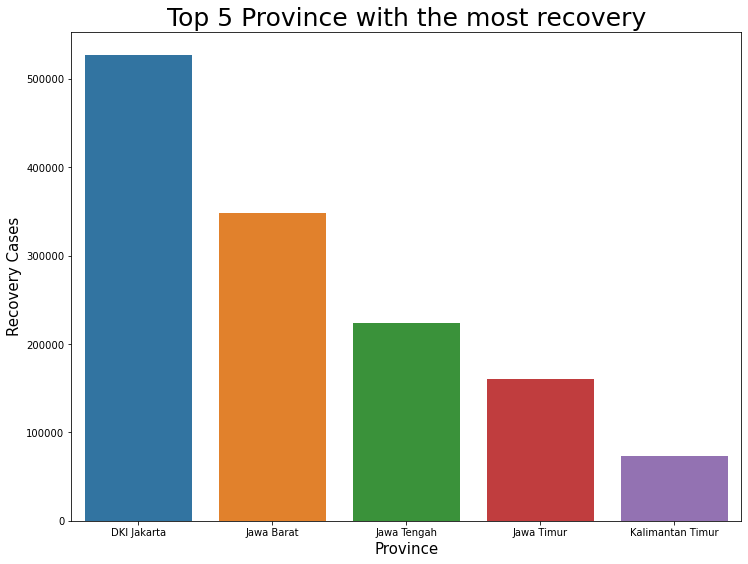

In [11]:
#Top 5 Province with the most recovery 
plt.figure(figsize=(12,9))
sns.barplot(newest[newest.Location != 'Indonesia'].sort_values(by=['Total Recovered'], ascending=False)['Location'].values[:5],  newest[newest.Location != 'Indonesia'].sort_values(by=['Total Recovered'], ascending=False)['Total Recovered'].values[:5])
plt.title('Top 5 Province with the most recovery', fontsize=25)
plt.xlabel('Province', fontsize=15)
plt.ylabel('Recovery Cases', fontsize=15)
plt.show()

In [12]:
# Creating Table, specifically in DKI Jakarta 
jakarta = data[data.Location == 'DKI Jakarta'].copy()
jakarta

,Date,Location,New Cases,New Deaths,New Recovered,New Active Cases,Total Cases,Total Deaths,Total Recovered,Total Active Cases,Location Level,Area (km2),Population,Population Density,Longitude,Latitude
53,3/1/2020,DKI Jakarta,2,0,0,2,39,20,139,-120,Province,664,10846145,16334.31,106.836118,-6.204699
55,3/2/2020,DKI Jakarta,2,0,0,2,41,20,139,-118,Province,664,10846145,16334.31,106.836118,-6.204699
60,3/3/2020,DKI Jakarta,2,0,0,2,43,20,139,-116,Province,664,10846145,16334.31,106.836118,-6.204699
65,3/4/2020,DKI Jakarta,2,0,0,2,45,20,139,-114,Province,664,10846145,16334.31,106.836118,-6.204699
70,3/5/2020,DKI Jakarta,0,1,0,-1,45,21,139,-115,Province,664,10846145,16334.31,106.836118,-6.204699
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16117,7/5/2021,DKI Jakarta,10902,120,6597,4185,591493,8717,491426,91350,Province,664,10846145,16334.31,106.836118,-6.204699
16151,7/6/2021,DKI Jakarta,9439,137,6100,3202,600932,8854,497526,94552,Province,664,10846145,16334.31,106.836118,-6.204699
16185,7/7/2021,DKI Jakarta,9365,142,3655,5568,610297,8996,501181,100120,Province,664,10846145,16334.31,106.836118,-6.204699
16219,7/8/2021,DKI Jakarta,12974,136,10857,1981,623271,9132,512038,102101,Province,664,10846145,16334.31,106.836118,-6.204699


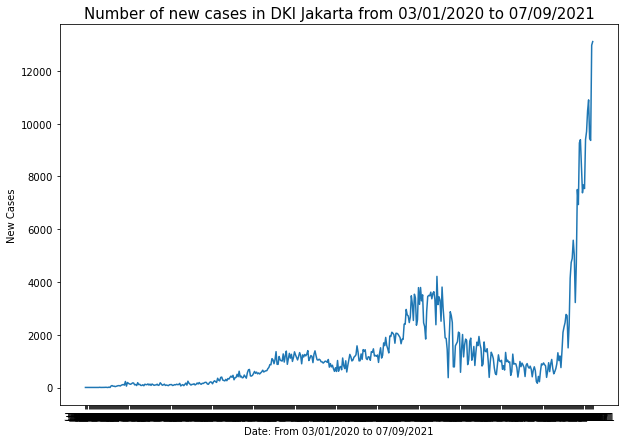

In [13]:
# Number of new cases in DKI Jakarta from 03/01/2020 to 07/09/2021
plt.figure(figsize=(10,7))
plt.plot(jakarta['Date'].values ,jakarta['New Cases'].values)
plt.title('Number of new cases in DKI Jakarta from 03/01/2020 to 07/09/2021', fontsize=15)
plt.xlabel('Date: From 03/01/2020 to 07/09/2021')
plt.ylabel('New Cases')
plt.show()

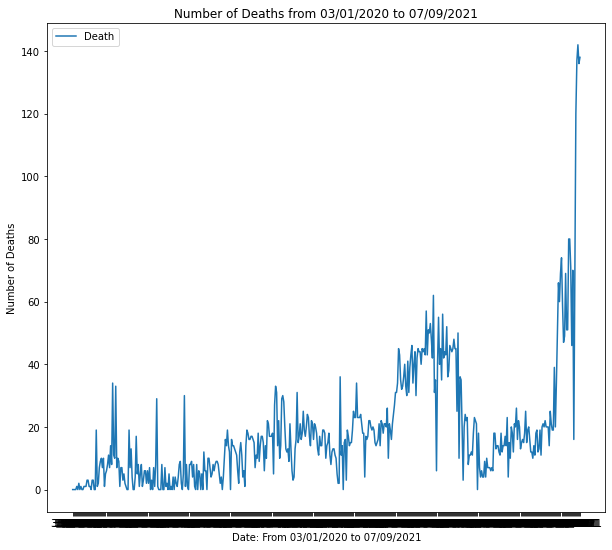

In [14]:
# Number of Deaths from 03/01/2020 to 07/09/2021
plt.figure(figsize=(10,9))
plt.plot(jakarta['Date'].values, jakarta['New Deaths'].values, label = 'Death')
plt.title('Number of Deaths from 03/01/2020 to 07/09/2021')
plt.xlabel('Date: From 03/01/2020 to 07/09/2021')
plt.ylabel('Number of Deaths')
plt.legend()
plt.show()

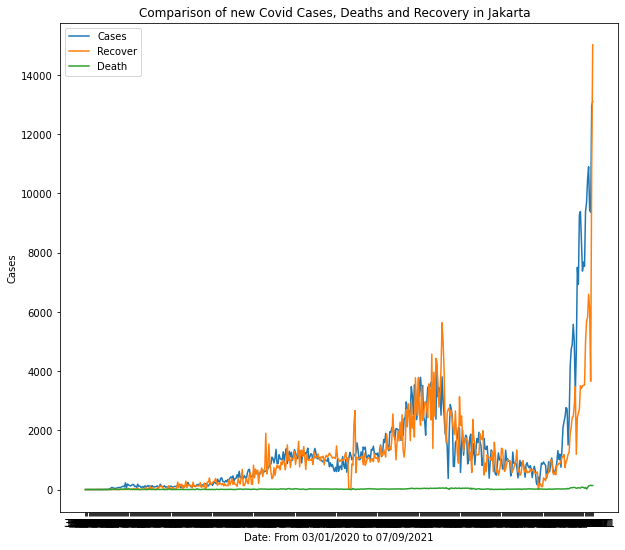

In [15]:
# Comparison of new Covid Cases, Deaths and Recovery in Jakarta 
plt.figure(figsize=(10,9))
plt.plot(jakarta['Date'].values ,jakarta['New Cases'].values, label='Cases')
plt.plot(jakarta['Date'].values, jakarta['New Recovered'].values, label = 'Recover')
plt.plot(jakarta['Date'].values, jakarta['New Deaths'].values, label = 'Death')
plt.title('Comparison of new Covid Cases, Deaths and Recovery in Jakarta  ')
plt.xlabel('Date: From 03/01/2020 to 07/09/2021')
plt.ylabel('Cases')
plt.legend()
plt.show()

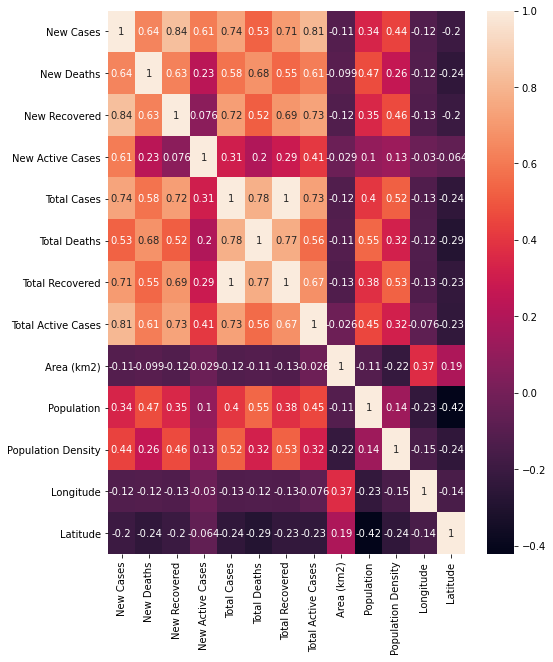

In [16]:
# Correlation between variable visualization through heatmap
plt.figure(figsize=(8,10))
sns.heatmap(cleaned_data.corr(), annot=True)
plt.show()

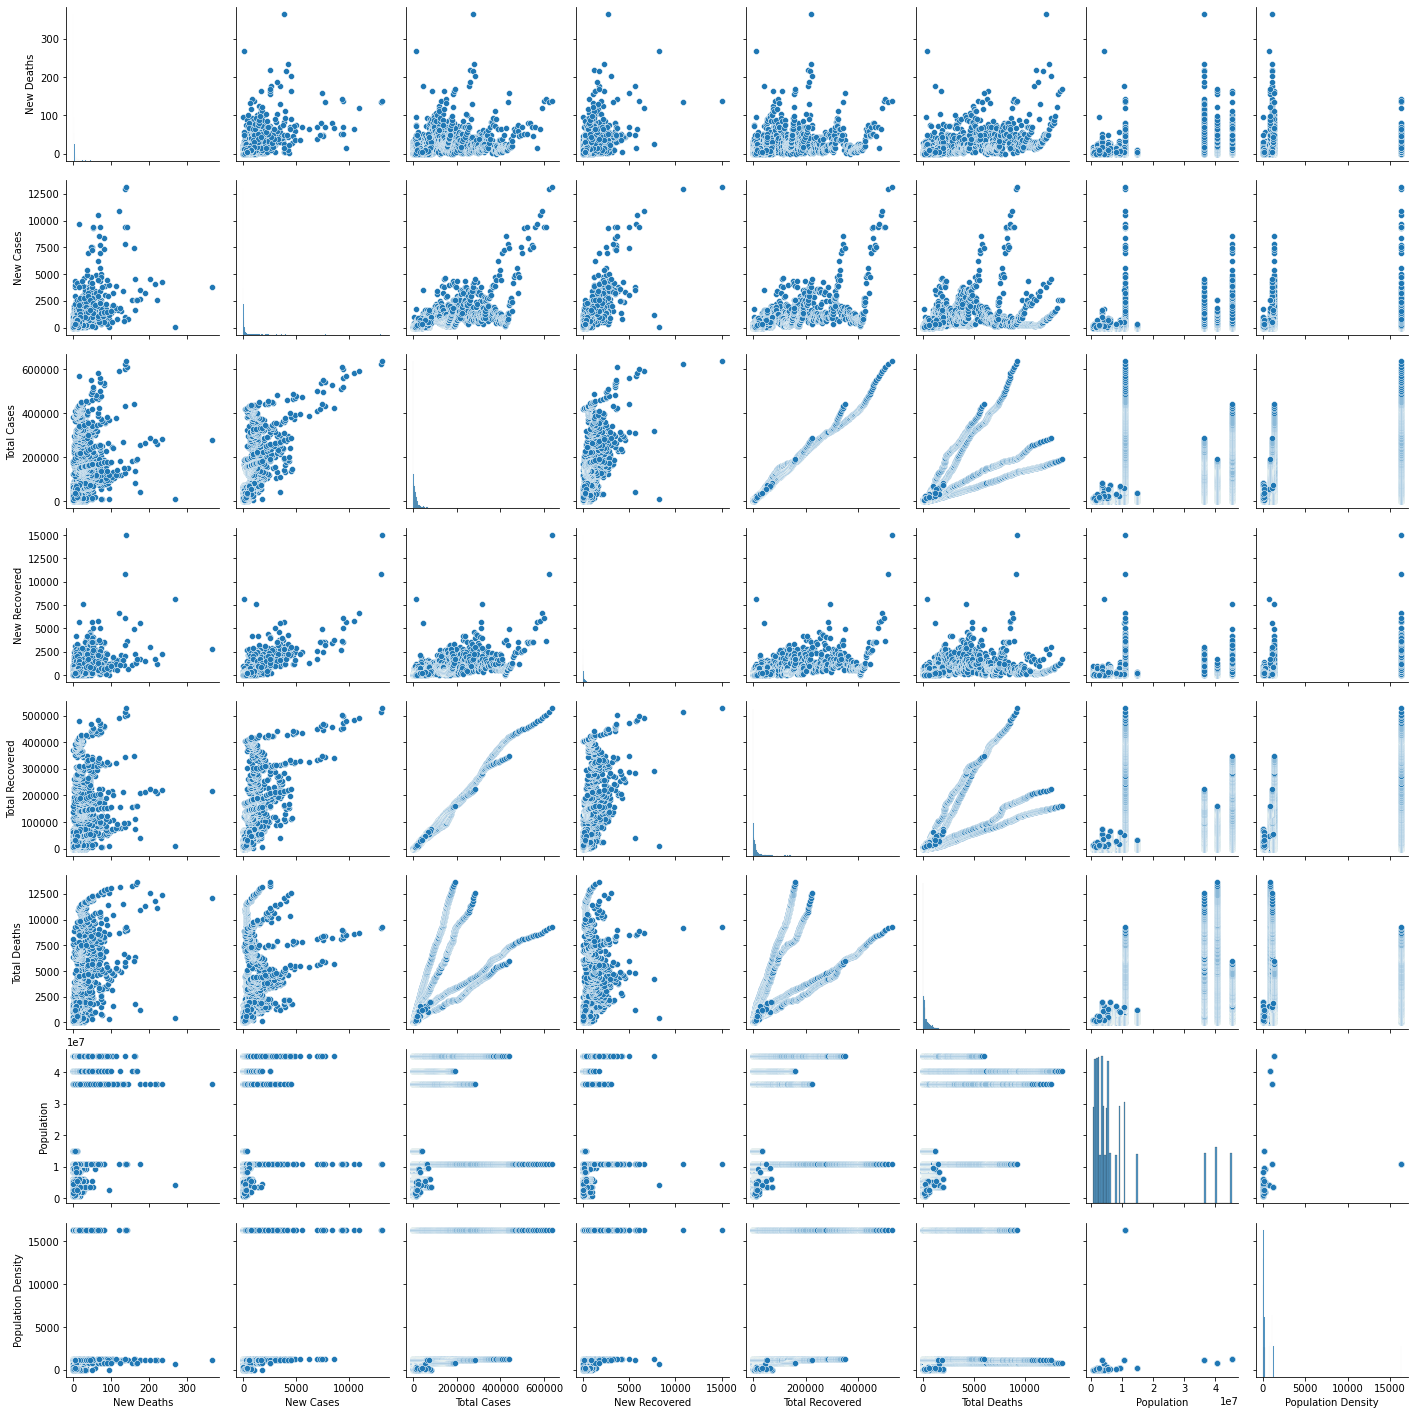

In [17]:
# Correlation between variable visualization through scatter plots
correlation_data = cleaned_data[['New Deaths', 'New Cases','Total Cases', 'New Recovered', 'Total Recovered', 'Total Deaths','Population', 'Population Density']]

sns.pairplot(correlation_data)
plt.show()
